# PHY480/905 Semester Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects must include the 5 major sections below (you do not need to use this template file).  Complete your work below and remove content in parentheses. 

#### PHY 480/905 Semester Project
### &#9989; Sara Sawford

#### &#9989; April 16, 2023

# ___PROJECT TITLE HERE___

## Introduction 


The Van der Pol oscillator is a non-linear oscillator given by the homogenous second order differential equation
\begin{equation}
    \frac{d^2 x}{d^2 t} + \mu(1-x^2)\frac{dx}{dt} = 0,
\end{equation}
where $\mu$ is a scalar that represents the strength of damping and the non-linearity of the system [1]. It can be used to describe the current oscillations in a vacuum tube circuit, which acts similarly to an incandescent lightbulb [2].  The circuit can be simplified to a DC voltage source *E* in series with a a non-Ohmic resistor *R*, a capacitor *C*, and an inductor *I*, as shown in Figure 1.  For simplicity, let $L = 1$ such that $V = \frac{dI}{dt}$ (See Appendix A for Proof).

Figure 1: A Van der Pol Oscillator with current that can be represented by Equation 1.


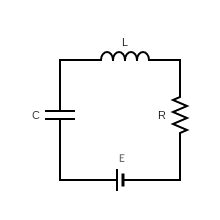

In [5]:
%matplotlib inline
from IPython.display import Image
print("Figure 1: A Van der Pol Oscillator with current that can be represented by Equation 1.")
Image('circuit-2.png')


Briefly, we will show how Equation 1 can be derived [3][4].  We begin by writing the current through the circuit according to Kirchoff's Laws as
\begin{equation}
    L\frac{dI}{dt}+RI+\frac{1}{C}Q = E, \nonumber
\end{equation}
which, when differentiated, becomes the second-order linear differential equation
\begin{equation}
    L\frac{d^2I}{d^t}+R\frac{dI}{dt}+\frac{1}{C}I = 0. \nonumber
\end{equation}
This equation represents a standard damped harmonic oscillator, which occurs when the resistor can assumed to be Ohmic. However, the resistor is non-Ohmic, which means when the current is too low, energy will be added to the system, and when current is too high, energy is damped (not removed, like an Ohmic resistor).  When Van der Pol studied this phenomenon, he found Equation 2 was more accurately stated as 
\begin{equation}
    L\frac{dI}{dt} + (I^2-\alpha)I + \frac{1}{C}Q = E. \nonumber
\end{equation}
By differentiating this equation, we find 
\begin{equation}
    L\frac{d^2I}{d^2t} + 3\frac{dI}{dt}(I^2-\frac{\alpha}{3})I + \frac{1}{C}I = 0. \nonumber
\end{equation}
Once rescaled into dimensionless variables, we find the orginal Van der Pol differential equation, given by Equation 1.

If we include an AC source that produces a voltage $V = Fcos(\omega t)$ in series with the DC source, we add a driving force, Equation 1 then becomes 
\begin{equation}
    \frac{d^2 x}{d^2 t} + \mu(1-x^2)\frac{dx}{dt} = Fcos(\omega t).
\end{equation}

There is not an analytical solution for $\mu \neq 0$ for either Equation 1 or 2, which means we must rely on numerical methods to find the current through the Van der Pol circuit [5].  However, different numerical methods yield different results in terms of the accuracy of convergence to the solution.  We must balance the accuracy we seek to the speed of the algorithm.  Therefore, there are three aim to this paper: to explore the numerical solutions with different damping factors, to explore the accuracy of different numerical methods, and to explore the speeds of the numerical methods.  

Section 3 explores the numerical methods used as well as how the accuracy and speeds for calculated.  We also provide an example of the algorithm's solution to a well-known scenario to ensure accuracy of the algorithm itself.  Section 4 will discuss the results of the algorithm.  There will be two subsections; one subsection will deal with the accuracy of the numerical methods, and the other will describe the speeds of the numerical methods.  Both subsections will provide the results from different damping factor values.  Section 5 will be the conclusion, in which the ideal numerical method will be provided, by weighing both accuracy and speed.  Further perspectives for this project will be considered.

## Methodology

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import math

We begin by modifying the second order differential equation to a linear system of first order differential equations below [6]:

$$
    x_1=\frac{dx}{dt} \nonumber \\ 
    \frac{dx_1}{dt}=\frac{d^2x}{d^2t} -x_2 + \epsilon(1-x_2^2)x_1 \nonumber \\

 
    x_2=x \nonumber \\
    \frac{dx_2}{dt}=\frac{dx}{dt} = x_1 \nonumber \\
$$

In Python, this corresponds to defining a function to take in initial values for $x_1$ and $x_2$, and outputting solutions for $\frac{dx_1}{dt}$ and $\frac{dx_2}{dt}$, as shown in Figure 2.

In [2]:
# Parameters = x (Current I, Voltage V), time, mu
# Returns [dI/dt, dV/dt] to use in numerical methods
def f(x, t, mu):
    # Unpack x = (x1, x2)
    # x1 = Current 
    # x2 = Voltage (dI/dt)
    x1 = x[0]
    x2 = x[1]
    dx1 = -x2+mu*(1-(x2**2))*x1 # dx1/dt
    dx2 = x1 # dx2/dt
    return np.array([dx1,dx2], float)


We can use the output of this function to update $x$ and $dx$ using three different methods: Euler's Method (Euler),the Second-Order Runge Kutta Method (RK2), and the Fourth-Order Runge Kutta Method (RK4).

First, let us consider Euler's Method, which can be calculated using the formula $$ x(t+h) \approx x(t) + h f(x,t),$$ and is given by the cell below, except modified to input two variables to represent the two first-order differential equations.

In [3]:
# Euler's Method function- Updates I,V for t+1
# Parameters: I, V, r = [I,V], time, step size
def Euler(y,dy,r,tpoints,h,mu):
    for t in tpoints:
        y.append(r[0])
        dy.append(r[1])
        r += h*f(r,t,mu)


Next, we use the Second-Order Runge Kutta Method (RK2), given by the formula 
$$\begin{align}
k_1 &= hf(x,t) \\
k_2 &= h f\left(x+\frac{1}{2}k_1,t+\frac{1}{2}h \right) \\
x(t+h) &= x(t)+k_2
\end{align}$$

Again, the code in the cell below is modified to update both current and voltage.

In [4]:
# Second-Order Runge Kutta function- Updates I,V for t+1
# Parameters: # Parameters: I, V, r = [I,V], time, step size
def RK2(y,dy, r, tpoints, h,mu):
    for t in tpoints:
        y.append(r[0])
        dy.append(r[1])
        k_1= h*f(r,t,mu)
        k_2 = h*f((r+0.5*k_1),(t+ 0.5*h),mu)
        r += k_2 

Finally, we will study the Fourth-Order Runge Kutta Method (RK4), given by 
$$\begin{align}
k_1 &= hf(x,t) \\
k_2 &= h f\left(x+\frac{1}{2}k_1,t+\frac{1}{2}h \right) \\
k_3 &= h f\left(x+\frac{1}{2}k_2,t+\frac{1}{2}h \right) \\
k_4 &= h f\left(x+\frac{1}{2}k_3,t+h \right) \\
x(t+h) &= x(t)+\frac{1}{6}( k_1+2k_2+2k_3+k_4)
\end{align}$$

In [5]:
# Fourth-Order Runge Kutta function- Updates I,V for t+1
# Parameters: # Parameters: I, V, r = [I,V], time, step size
def RK4(y,dy,r,tpoints,h,mu):
    for t in tpoints:
        y.append(r[0])
        dy.append(r[1])
        k1 = h*f(r,t,mu)
        k2 = h*f(r+0.5*k1,t+0.5*h,mu)
        k3 = h*f(r+0.5*k2,t+0.5*h,mu)
        k4 = h*f(r+k3,t+h,mu)
        r += (k1+2*k2+2*k3+k4)/6

It is especially important to verify the accuracy of the algorithm created because there are not analytical solutions to compare the solutions against.  To verify accuracy, we begin by exploring the solutions to the Van der Pol differential equation without a driving force when $\mu = 0$, which turns Equation 1 into
\begin{equation}
    \frac{d^2 x}{d^2 t} = -x,
\end{equation}
which is the well known formula for a harmonic oscillator with the solution $x(t) = Acos(\omega t)$.  

<!-- \caption{Numerical Solutions for Euler's Method, and the Second- and Fourth-Order Runge-Kutta Method plotted against the analytical solution.  Initial conditions are given as $I(0) = .5 A$, $\frac{dI}{dt} = 0 V$, with a step size of .00001.} -->



Text(0.5, 1.0, 'Difference Between Analytical and Numerical Solutions 0')

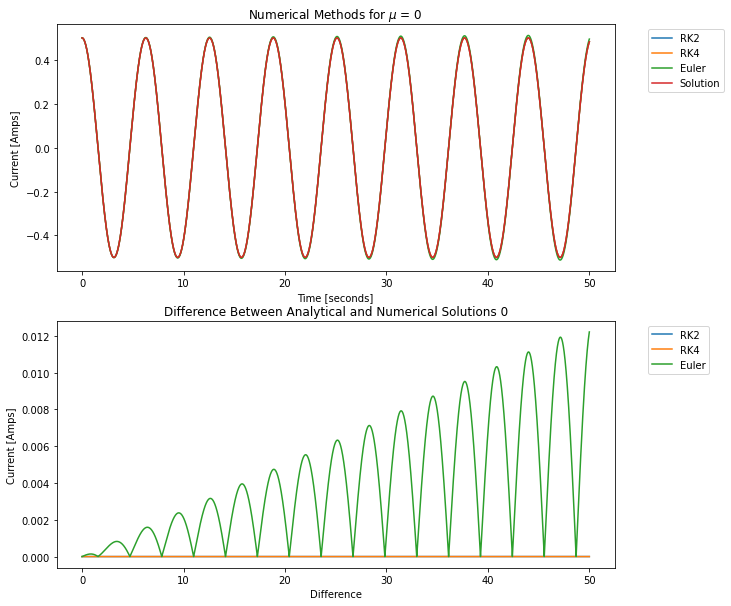

In [8]:
# Start of interval
a = 0.0
# End of interval
b = 50.0

# Number of steps
N = 50000
# Size of single step
h = (b-a)/N

# mu= 0 simplifies dif-eq into easy-to-solve equation to test accuracy of functions
mu = 0.0

# Set up initial arrays
# Array to store time steps
tpoints = np.arange(a,b,h)
# Array to store Current (y)
y = []
# Array to store Voltage (dy)
dy = []
# Initial conditions: I = .5 A, V = 0.
r = np.array([.5,0.],float)

# Append each solution array so all solutions are in one array
y_sol = []
dy_sol = []

# Iterate through three different methods
for i in range(0,3):
    # Reset initial arrays and conditions
    y = []
    dy = []
    r = np.array([.5,0.],float)
    if i == 0:
        # Update y,dy using RK2
        RK2(y,dy,r,tpoints,h, mu)
        # Add current and voltage solutions to array to plot later
        y_sol.append(y)
        dy_sol.append(dy)
    elif i == 1:
        # Update y,dy using RK4
        RK4(y,dy,r,tpoints,h,mu)
        # Append current and voltage solutions to array to plot later
        y_sol.append(y)
        dy_sol.append(dy)

    else:
        # Update y,dy using Euler's Method
        Euler(y,dy,r,tpoints,h,mu)
        # Append current and voltage solutions to array to plot later
        y_sol.append(y)
        dy_sol.append(dy)

# Analytical solution to the Van der Pol Differential Equation when mu = 0.
actual = .5*np.cos(tpoints)

fig, ax = plt.subplots(2,1)
fig.set_size_inches(10,10)
# Plot RK2 against time
ax[0].plot(tpoints,y_sol[0], label = "RK2")
# Plot RK4 against time
ax[0].plot(tpoints,y_sol[1], label = "RK4")
# Plot Euler against time
ax[0].plot(tpoints,y_sol[2], label = "Euler")
# Plot analytical solution
ax[0].plot(tpoints, actual, label = "Solution")
ax[0].legend(bbox_to_anchor=(1.05,1), loc="upper left")
ax[0].set_xlabel("Time [seconds]")
ax[0].set_ylabel("Current [Amps]")
ax[0].set_title("Numerical Methods for $\mu$ = " + str(0))

ax[1].plot(tpoints,abs(y_sol[0] - actual), label = "RK2")
# Plot RK4 against time
ax[1].plot(tpoints,abs(y_sol[1] - actual), label = "RK4")
# Plot Euler against time
ax[1].plot(tpoints,abs(y_sol[2] - actual), label = "Euler")
# Plot analytical solution
ax[1].legend(bbox_to_anchor=(1.05,1), loc="upper left")
ax[1].set_xlabel("Difference")
ax[1].set_ylabel("Current [Amps]")
ax[1].set_title("Difference Between Analytical and Numerical Solutions " + str(0))

Clearly, the Second- and Fourth-Order Runge Kutta solutions converge to the analytic solution almost immediately, while Euler's method seems to diverge from the solution.  However, the difference between the analytical and Euler's solution is only 12% after 50 seconds, so the difference can be excused.  Therefore, we have verified the accuracy of these numerical methods, and may now begin the analysis of the accuracy at different step sizes and speed of convergence.

#### A. Accuracy at Different Step Sizes
First, we set out to figure out which numerical method will converge to a solution with the fewest step sizes.  Although there is no analytical solution for $\mu \neq 0$, we assert that a solution will be found when the plot of time versus current does not change between two step sizes.  We will start with a function that inputs the number of points to calculate the current for between two bounds and an index to plot the results on separate subplots.  For this section, we will assume $\mu = .1$, and $I(0) = .5 A$, and $V(0) = 0 V$.

In [9]:
# Changing_numer_points: Run each numerical method and plot results for different number of steps
# Parameters: N = Number of steps, index = index of subplot to plot results in
def changing_number_points(N, index):
    # Start of interval
    a = 0.0
    # End of interval
    b = 50.0

    # Size of single step
    h = (b-a)/N

    # mu= 0 simplifies dif-eq into easy-to-solve equation to test accuracy of functions
    mu = .1

    # Set up initial arrays
    # Array to store time steps
    tpoints = np.arange(a,b,h)
    # Array to store Current (y)
    y = []
    # Array to store Voltage (dy)
    dy = []
    # Initial conditions: I = .5 A, V = 0.
    r = np.array([.5,0.],float)

    # Append each solution array so all solutions are in one array
    y_sol = []
    dy_sol = []

    for i in range(0,3):
        # Reset initial arrays and conditions
        y = []
        dy = []
        r = np.array([.5,0.],float)
        if i == 0:
            # Update y,dy using RK2
            RK2(y,dy,r,tpoints,h, mu)
            # Add current and voltage solutions to array to plot later
            y_sol.append(y)
            dy_sol.append(dy)
        elif i == 1:
            # Update y,dy using RK4
            RK4(y,dy,r,tpoints,h,mu)
            # Append current and voltage solutions to array to plot later
            y_sol.append(y)
            dy_sol.append(dy)

        else:
            # Update y,dy using Euler's Method
            Euler(y,dy,r,tpoints,h,mu)
            # Append current and voltage solutions to array to plot later
            y_sol.append(y)
            dy_sol.append(dy)
            
    ax[index].plot(tpoints,y_sol[0], label = "RK2")
    ax[index].plot(tpoints,y_sol[1], label = "RK4")
    ax[index].plot(tpoints,y_sol[2], label = "Euler")

    ax[index].legend()
    ax[index].set_xlabel("t")
    ax[index].set_ylabel("x(t)")
    ax[index].set_title("N = " + str(N))

    return tpoints, y_sol, dy_sol


#### B. Speed of Convergence

## Results and Discussion

#### A. Accuracy at Different Step Sizes
We begin by call the function *changing_number_points* for a range of different numbers of steps.

In [12]:
from scipy.signal import find_peaks_cwt

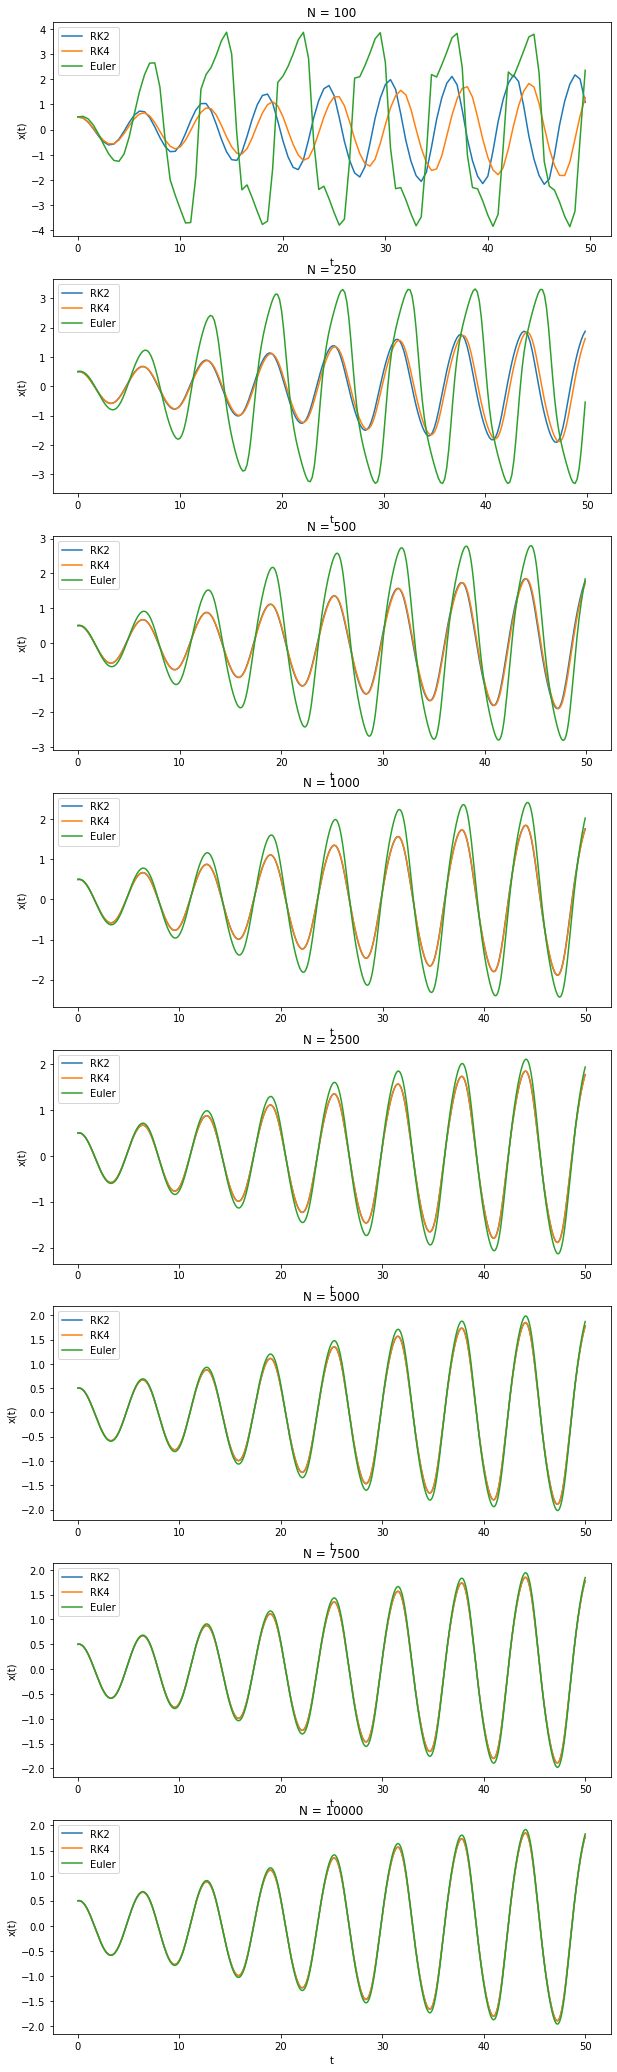

In [53]:
N = [100, 250, 500, 1000, 2500, 5000, 7500, 10000]

fig,ax = plt.subplots(len(N),1)
fig.set_size_inches(10,37)
tpoints = []
y_sol = []
dy_sol = []
peaks = []

for i in range(len(N)):
    t, y, dy = changing_number_points(N[i],i)
    tpoints.append(t)
    y_sol.append(y)
    dy_sol.append(y)
        
    index = (find_peaks_cwt(y[0], np.arange(1,49)))
    # print(len(index))
    peaks.append(index)

        

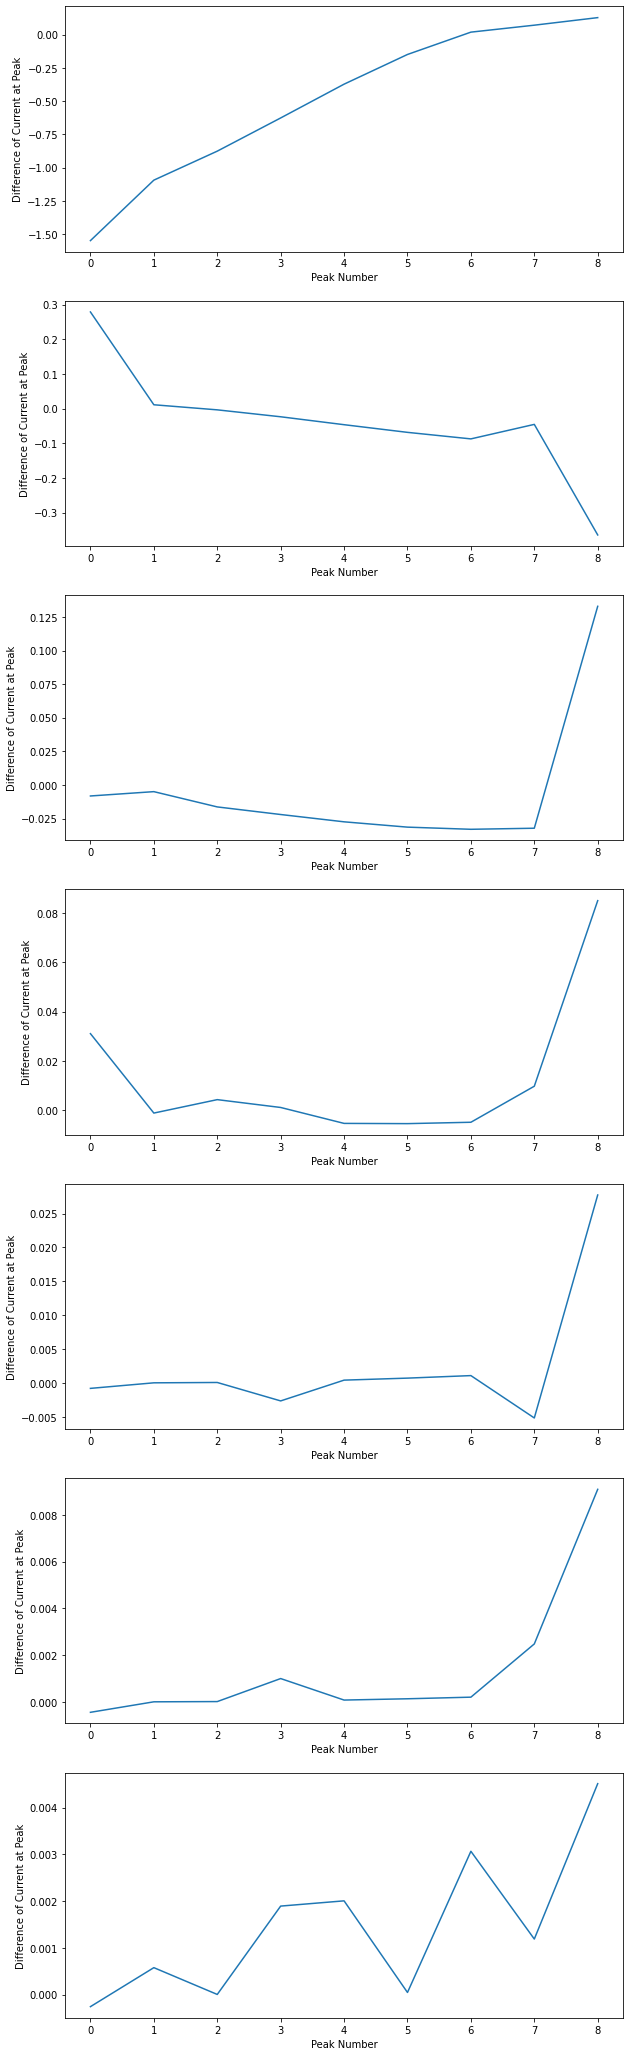

In [58]:
fig,ax = plt.subplots(len(peaks)-1,1)
fig.set_size_inches(10,37)


for i in range(1,len(peaks)):
    temp1 = []
    temp2 = []
    time = []
    for val in peaks[i]:
        temp1.append(y_sol[i][0][val])
    for val in peaks[i-1]:
        temp2.append(y_sol[i-1][0][val])
        # time.append(tpoints[i][val])
    ax[i-1].plot((abs(np.array(temp1)) - (abs(np.array(temp2)))))
    ax[i-1].set_xlabel("Peak Number")
    ax[i-1].set_ylabel("Difference of Current at Peak")


Based on the plots, it appears that the Fourth-Order Runge Kutta Method converges even with just 100 steps between 0 and 50.  Similarly, the Second-Order Runge Kutta Method is nearly converged by 250 steps, but is equal to the Fourth-Order Runge Kutta Method by 500 steps.  However, even after 10,000 steps, Euler's Method is still not perfectly converged with the Runge Kutta Methods.

#### B. Speed of Convergence

##  Conclusion and Perspectives

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

To ensure my work was saved if my notebook crashed, I created a GitHub repository that I pushed the most updated copy of this notebook to.  I pushed my updates after every session that I worked on this notebook.  The repository can be found here: https://github.com/sawfords/PHY480_Final_Project/blob/master/Sawford_ProjectNotebook.ipynb

## References

1. Van der Pol Oscillator. University of Connecticut Physics. (n.d.). Retrieved April 16, 2023, from \\ https://www.phys.uconn.edu/~rozman/Courses/P2200_13F/downloads/vanderpol/vanderpol-oscillator.c 

2. Silver Noax, W. (2017, November). Vacuum tubes. Nuts and Volts Magazine. Retrieved April 16, 2023, from https://www.nutsvolts.com/magazine/article/vacuum-tubes 

3. Duke Mathematics Department. (1998). The van der Pol System. The van der pol system. Retrieved April 16, 2023, from https://services.math.duke.edu/education/ccp/materials/diffeq/vander/vand1.html 

4. Girotti, M. (n.d.). The Van der Pol Oscillator. GitHub. Retrieved April 17, 2023, from https://mathemanu.github.io/VanderPol.pdf 

5. Salas, A., Martínez H, L. J., &amp; Ocampo R, D. L. (2022, March 25). Analytical and Numerical Study to a Forced Van der Pol Oscillator. Mathematical Problems in Engineering. Retrieved April 16, 2023, from https://www.hindawi.com/journals/mpe/2022/9736427/ 

6. Transforming a second-order differential equation into system of first-order. (2021, January 17). Retrieved April 16, 2023, from https://bai-gaming.com/math-guides/transform-second-order-into-system-first-order/ 

##  Appendices


### Appendix A
The voltage change across an inductor can be represented by 
\begin{equation}
    V = I \frac{dI}{dt}. \nonumber
\end{equation}
Therefore, by letting $I = 1 H$, the first derivative of current can be represented simply by the voltage.